## Импорт библиотек

In [68]:
import pandas as pd

from sklearn.datasets import make_classification

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro, probplot, skew

In [42]:
import warnings

warnings.filterwarnings('ignore')

## Генерируем данные

In [22]:
data = make_classification(n_samples=10000, n_features=6)

X = pd.DataFrame(data[0])
X['cluster'] = data[1]

X.head()

,0,1,2,3,4,5,cluster
0,0.455885,0.194542,0.867886,-1.232266,-0.786155,1.084305,0
1,-1.854549,-0.381930,-0.866910,1.027040,0.861117,-1.156866,1
2,-1.816205,1.097050,0.743310,-0.927833,-0.720772,0.974833,0
3,0.090093,-0.198032,-1.584636,1.085040,1.868848,-2.401424,1
4,0.189990,-0.466238,-1.583479,0.998190,1.899505,-2.430820,1


## Разведочный анализ

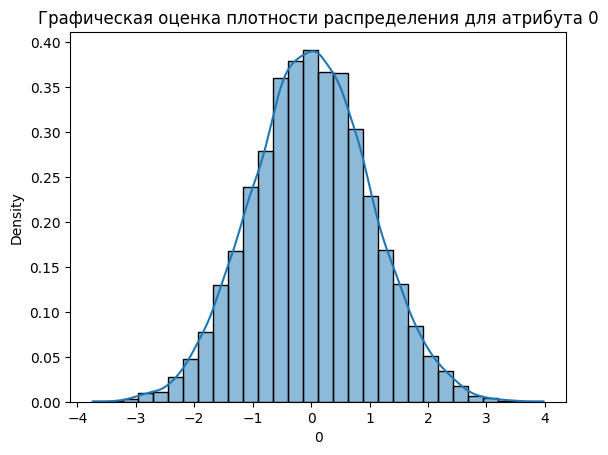

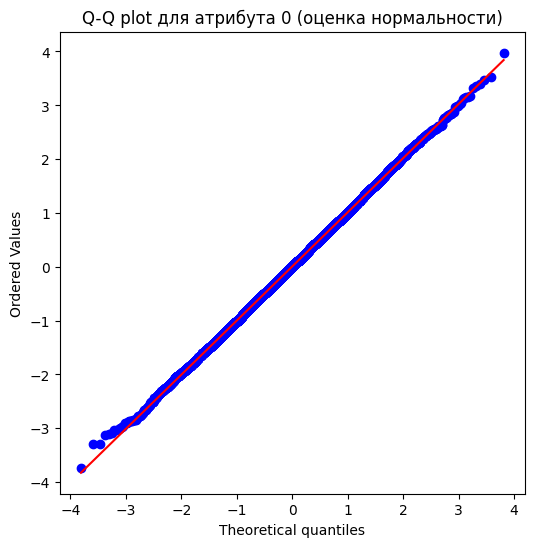

Атрибут: 0
Статистика Шапиро-Уилка: 1.000, p-value: 0.741
Коэффициент асимметрии: 0.024
Вывод: Распределение нормально!
Мера скошенности: Правостороннее (положительная асимметрия)
--------------------------------------------------


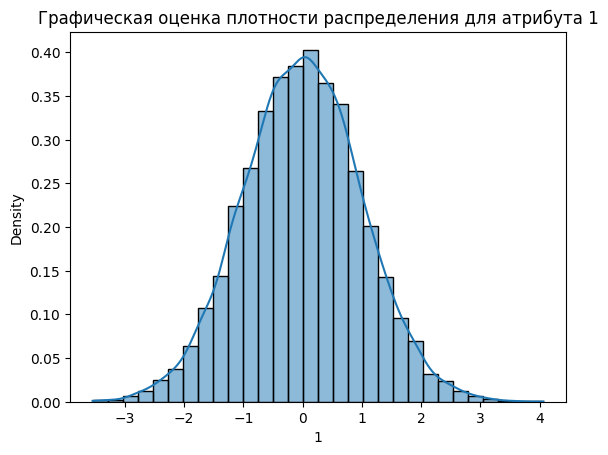

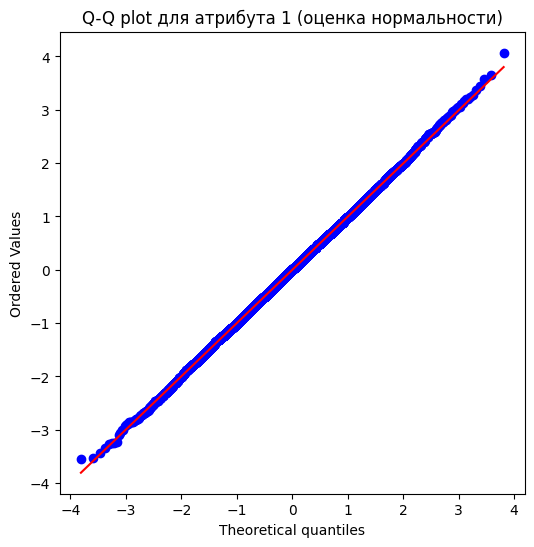

Атрибут: 1
Статистика Шапиро-Уилка: 1.000, p-value: 0.892
Коэффициент асимметрии: 0.014
Вывод: Распределение нормально!
Мера скошенности: Правостороннее (положительная асимметрия)
--------------------------------------------------


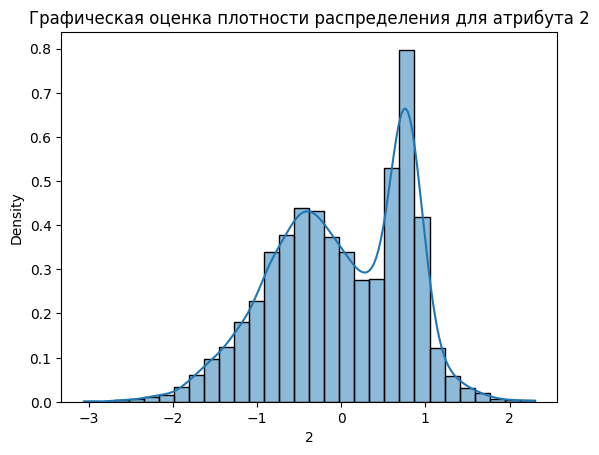

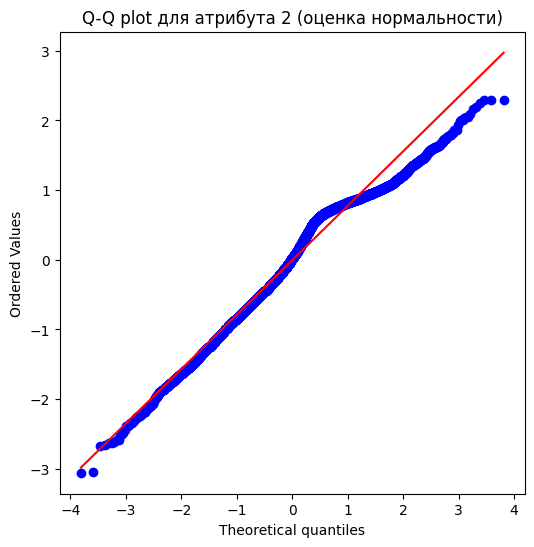

Атрибут: 2
Статистика Шапиро-Уилка: 0.971, p-value: 0.000
Коэффициент асимметрии: -0.341
Вывод: Распределение отличается от нормального!
Мера скошенности: Левостороннее (отрицательная асимметрия)
--------------------------------------------------


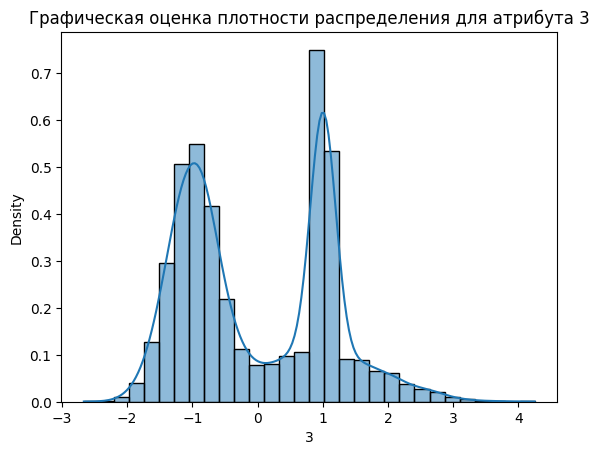

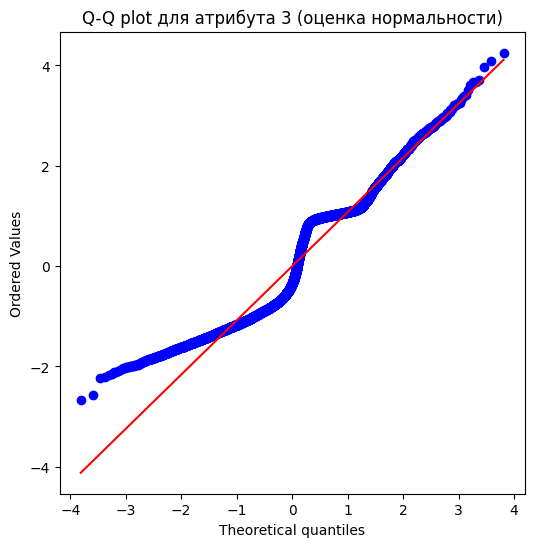

Атрибут: 3
Статистика Шапиро-Уилка: 0.918, p-value: 0.000
Коэффициент асимметрии: 0.307
Вывод: Распределение отличается от нормального!
Мера скошенности: Правостороннее (положительная асимметрия)
--------------------------------------------------


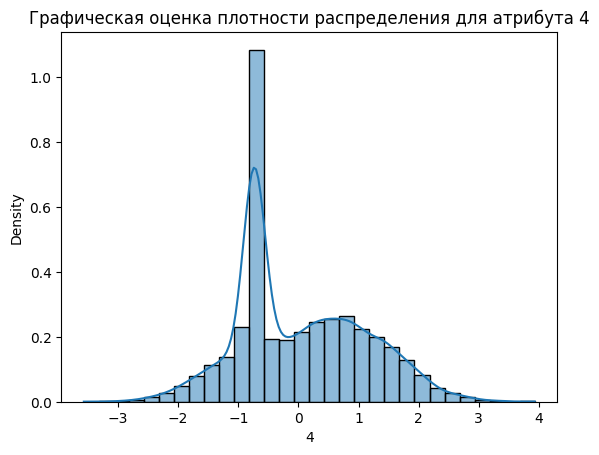

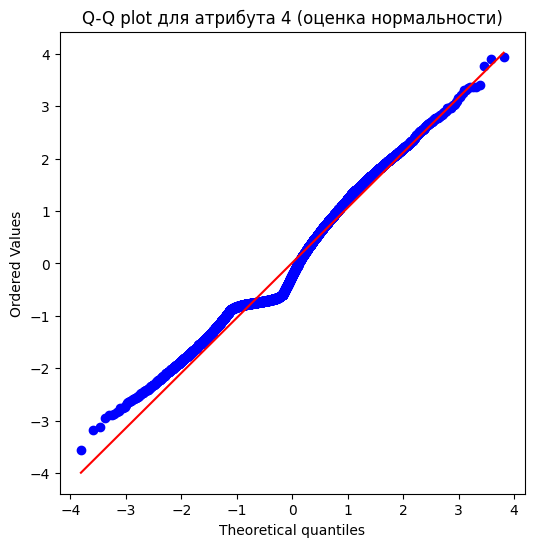

Атрибут: 4
Статистика Шапиро-Уилка: 0.964, p-value: 0.000
Коэффициент асимметрии: 0.371
Вывод: Распределение отличается от нормального!
Мера скошенности: Правостороннее (положительная асимметрия)
--------------------------------------------------


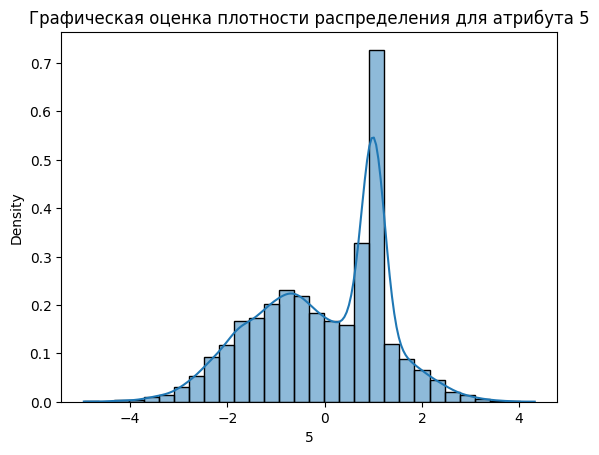

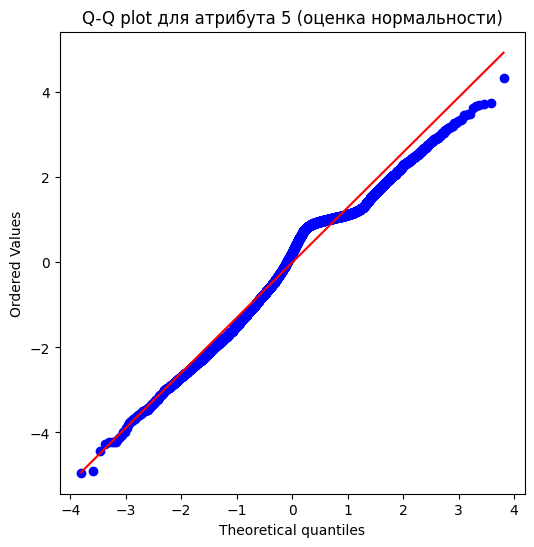

Атрибут: 5
Статистика Шапиро-Уилка: 0.965, p-value: 0.000
Коэффициент асимметрии: -0.372
Вывод: Распределение отличается от нормального!
Мера скошенности: Левостороннее (отрицательная асимметрия)
--------------------------------------------------


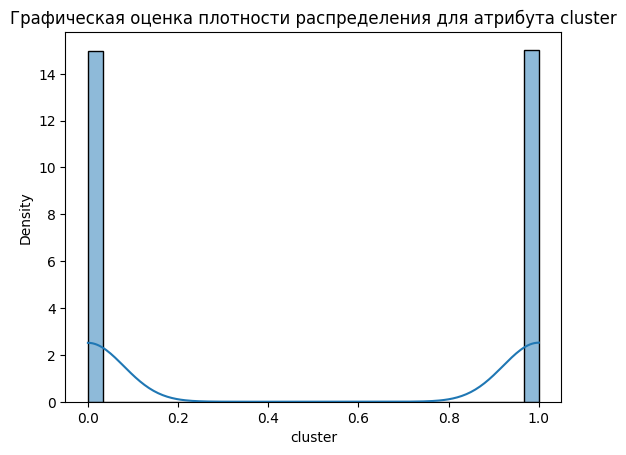

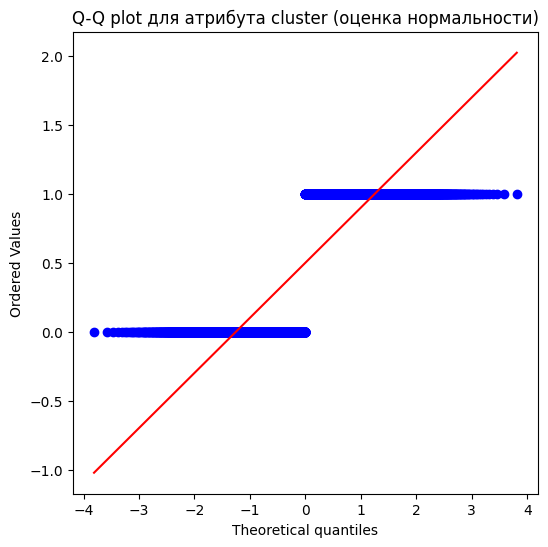

Атрибут: cluster
Статистика Шапиро-Уилка: 0.637, p-value: 0.000
Коэффициент асимметрии: -0.003
Вывод: Распределение отличается от нормального!
Мера скошенности: Левостороннее (отрицательная асимметрия)
--------------------------------------------------


In [78]:
for col in X:
  # Гистограмма и график плотности
  sns.histplot(X[col], kde=True, bins=30, stat="density")
  plt.title(f'Графическая оценка плотности распределения для атрибута {col}')
  plt.show()

  # Q-Q plot
  plt.figure(figsize=(6, 6))
  probplot(X[col].dropna(), dist="norm", plot=plt)
  plt.title(f'Q-Q plot для атрибута {col} (оценка нормальности)')
  plt.show()


  # Статистическая оценка нормальности распределения (тест Шапиро-Уилка)
  statistic, p_value = shapiro(X[col].dropna())  # Убираем пропущенные значения
  skewness = skew(X[col].dropna())  # Коэффициент асимметрии
  print(f'Атрибут: {col}')
  print(f'Статистика Шапиро-Уилка: {statistic:.3f}, p-value: {p_value:.3f}')
  print(f'Коэффициент асимметрии: {skewness:.3f}')


  if p_value < 0.05:
      print('Вывод: Распределение отличается от нормального!')
  else:
      print('Вывод: Распределение нормально!')

  if skewness > 0:
      print('Мера скошенности: Правостороннее (положительная асимметрия)')
  elif skewness < 0:
      print('Мера скошенности: Левостороннее (отрицательная асимметрия)')
  else:
      print('Мера скошенности: Симметричное распределение')

  print('-' * 50)

## Поиск значимых атрибутов

## Корреляция

Чем выше (по модулю) значение корреляции, тем больше влияние признака на разделение объектов.

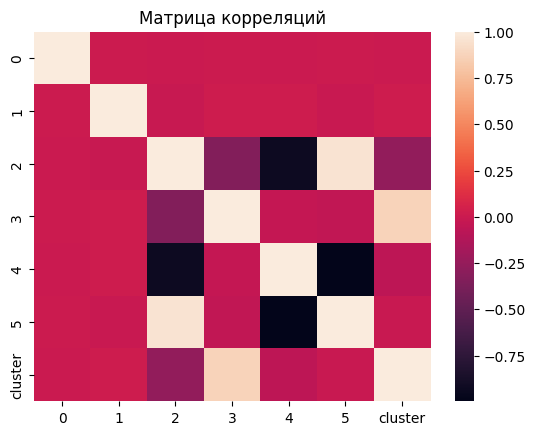

In [81]:
X_corr = X.corr()

sns.heatmap(X_corr)
plt.title('Матрица корреляций');

Влияние признака на образование кластера по убыванию

In [84]:
X_corr['cluster'].drop('cluster').sort_values(ascending=False)

,cluster
3,0.871668
1,0.014258
0,0.001665
5,-0.009701
4,-0.061589
2,-0.263684


Из таблицы видно, что атрибут 3 больше всего коррелирует с меткой кластера.